In [ ]:
# Machine Learning and Bioinspired Optimisation

# import library

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class MultiArmedBandit:
  def __init__(self, n_arms):
    """
    Initialize an n-armed bandit, where each arm's true reward follows N(μ, 1)

    Attributes:
        - n_arms (int): Number of arms.
        - arms_true_reward (np.ndarray): True reward means for each arm, sampled from N(0, 1).
        - count_arm (np.ndarray): Count of selections for each arm, initialized to 0.
        - estimated_reward (np.ndarray): Estimated rewards for each arm, initialized with 0.
    """
    self.n_arms = n_arms
    self.arms_true_reward = np.random.normal(0, 1, n_arms)
    self.count_arm = np.zeros(n_arms)
    #self.estimated_reward = np.random.normal(0, 0.01, n_arms) # Add small noise to initial estimates
    self.estimated_reward = np.zeros(n_arms)

  def step(self, action):
    """
    Perform an action (pull an arm) and return the reward
    """
    reward = np.random.normal(self.arms_true_reward[action], 1) #Generate reward from normal distribution with std dev 1
    return reward # Reward sampled from N(true_reward, 1).

  def select_action(self, greedy_rate):
    """
    Select an action using the ε-greedy strategy
    """
    if np.random.random() < greedy_rate: # Explore with probability ε
      return np.random.randint(self.n_arms) # Randomly select an arm
    else: #Exploit with probability 1-ε
      max_value = np.max(self.estimated_reward) # Find the highest estimated reward
      max_indices = np.where(self.estimated_reward == max_value)[0] # Find all arms with the highest reward
      if len(max_indices) == 0:
        return np.random.randint(self.n_arms) # If no arm has the highest reward, randomly select one
      return np.random.choice(max_indices) # tie-breaking

  def update_reward(self, action, reward):
    """
    Update the action-value estimate
    """
    self.count_arm[action] += 1 # Increment the selection count for the arm
    n = self.count_arm[action] # Number of selections for the arm
    if n == 0:
      return # If no selections have been made, do not update the estimate
    self.estimated_reward[action] += (reward - self.estimated_reward[action]) / n # Update estimate using sample average

def experiment(bandit, greedy_rate, n_steps):
  """
  Run an experiment, record rewards and optimal actions
  """
  per_step_rewards = np.zeros(n_steps) #Rewards at each step (not averaged)
  optimal_actions = np.zeros(n_steps)
  optimal_arm = np.argmax(bandit.arms_true_reward)

  for i in range(n_steps): # Iterate over all steps
    action = bandit.select_action(greedy_rate) # Select an action
    reward = bandit.step(action) # Get reward
    bandit.update_reward(action, reward) # Update estimates
    per_step_rewards[i] = reward #Rewards at each step
    if action == optimal_arm: # Record if optimal action was chosen
      optimal_actions[i] = 1
    else:
      optimal_actions[i] = 0
  return per_step_rewards, optimal_actions # Return average rewards and optimal action indicators

# Assignment
n_arms = 10 # Number of arms
n_steps = 2000 #Total number of steps
greedy_rates = [0, 0.01, 0.1] # Exploration rates to test
runs = 2000 # Number of independent runs
results = {} # Store results

for greedy_rate in greedy_rates: # Iterate over all ε values
    all_per_step_rewards = np.zeros((runs, n_steps))
    all_opt_actions = np.zeros((runs, n_steps))
    for r in range(runs):
        bandit = MultiArmedBandit(n_arms)
        per_step_rewards, optimal_actions = experiment(bandit, greedy_rate, n_steps)
        all_per_step_rewards[r, :] = per_step_rewards
        all_opt_actions[r, :] = optimal_actions
# Average over all runs
    avg_rewards = np.mean(all_per_step_rewards, axis=0)
    all_opt_actions = np.mean(all_opt_actions, axis=0)
    results[greedy_rate] = (avg_rewards, all_opt_actions)


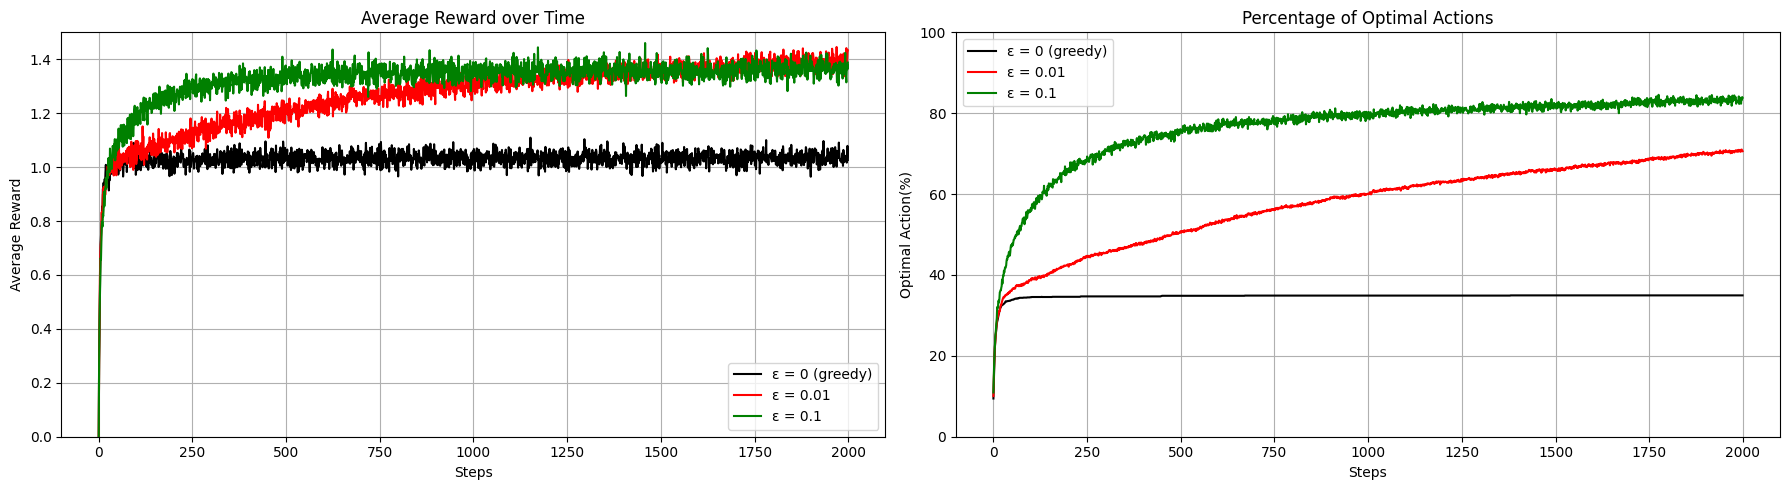


Final Performance Metrics:
ε = 0: Final Avg Reward = 1.026, Final Optimal Action % = 34.95%
ε = 0.01: Final Avg Reward = 1.433, Final Optimal Action % = 70.60%
ε = 0.1: Final Avg Reward = 1.388, Final Optimal Action % = 83.80%

Full Experiment Average Rewards:
ε = 0: Full Avg Reward = 1.028
ε = 0.01: Full Avg Reward = 1.270
ε = 0.1: Full Avg Reward = 1.325


In [ ]:
# Plot results
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
colors = {0: 'black', 0.01: 'red', 0.1: 'green'}  # Colors matching Figure 2.1
labels = {0: 'ε = 0 (greedy)', 0.01: 'ε = 0.01', 0.1: 'ε = 0.1'}
for greedy_rate in greedy_rates:
    avg_rewards, _ = results[greedy_rate]
    plt.plot(avg_rewards, label=labels[greedy_rate], color=colors[greedy_rate])
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward over Time')
plt.ylim(0, 1.5)  # Set y-axis range for better readability
plt.legend(loc='best')
plt.grid(True)

plt.subplot(1, 2, 2)
for greedy_rate in greedy_rates:
    _, optimal_actions = results[greedy_rate]
    plt.plot(optimal_actions * 100, label=labels[greedy_rate], color=colors[greedy_rate])
plt.xlabel('Steps')
plt.ylabel('Optimal Action(%)')
plt.title('Percentage of Optimal Actions')
plt.ylim(0, 100)  # Set y-axis range for better readability
plt.grid(True)
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Optional: Print final performance metrics for analysis
print("\nFinal Performance Metrics:")
for greedy_rate in greedy_rates:
    final_avg_reward = results[greedy_rate][0][-1]  # Final average reward
    final_opt_action = results[greedy_rate][1][-1] * 100  # Final optimal action percentage
    print(f"ε = {greedy_rate}: Final Avg Reward = {final_avg_reward:.3f}, Final Optimal Action % = {final_opt_action:.2f}%")

print("\nFull Experiment Average Rewards:")
for greedy_rate in greedy_rates:
    avg_rewards, _ = results[greedy_rate]
    full_avg_reward = np.mean(avg_rewards)
    print(f"ε = {greedy_rate}: Full Avg Reward = {full_avg_reward:.3f}")